In [9]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

execfile('synset.py')
descs = [s for s in synset ]
zebra = plt.imread('zebra.jpg')/255.

index = 340
eta = 0.1

# part = int(0.4*len(X_all))
X_all = 2.*np.load("hw4-train-data.npy").astype(np.float32)/255. - 1.
Y_all = np.load("hw4-train-labels.npy").astype(np.int32)
# X_all = X_all[:part]
# Y_all = Y_all[:part]
perm = np.random.permutation(len(X_all))
ntrn = int(0.9*len(X_all))
X_tr,Y_tr = X_all[perm[:ntrn]],Y_all[perm[:ntrn]]
X_val,Y_val = X_all[perm[ntrn:]],Y_all[perm[ntrn:]]

In [2]:
def get_from_graph():
    meta = tf.train.import_meta_graph("ResNet-L50.meta")
    opers = tf.get_default_graph().get_operations()
    X = tf.Graph.get_tensor_by_name(tf.get_default_graph(),'images:0')
    Y = tf.Graph.get_tensor_by_name(tf.get_default_graph(),'prob:0')
    logits = tf.Graph.get_tensor_by_name(tf.get_default_graph(),'fc/xw_plus_b:0')
    return meta, opers,X,Y,logits
def print_adv(im1,im2, ind1, ind2):
    plt.imshow(im1)
    plt.title(descs[ind1])
    plt.show()

    plt.imshow(im2)
    plt.title(descs[ind2])
    plt.show()

    plt.imshow(np.abs(im1-im2).sum(axis=2))
    plt.title('change')
    plt.show()

('Number of nodes = ', 5994)
('Number of placeholders among them = ', 1)
('Max number of inputs = ', 270)
('Node name with max num of inputs = ', u'save/SaveV2')
INFO:tensorflow:Restoring parameters from ResNet-L50.ckpt
('The probability at the index 340 = ', 0.99991286)
('Corresponding class is ', 'n02391049 zebra')


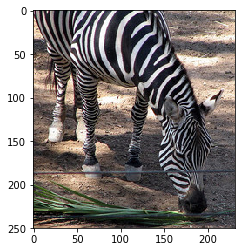

In [3]:
# 1)
with tf.Graph().as_default():
    meta, opers, X, Y , logits = get_from_graph()
    print("Number of nodes = ",len(opers))
    print("Number of placeholders among them = ", len([o for o in opers if o.type == 'Placeholder']))
    print("Max number of inputs = ", max([len(o.inputs) for o in opers]))
    print("Node name with max num of inputs = ", max([o.name for o in opers if len(o.inputs)==270]))
    
    with tf.Session() as sess:
        meta.restore(sess, "ResNet-L50.ckpt")
        prob = Y.eval(feed_dict={X: [zebra]})
        print("The probability at the index 340 = ",prob[0,index])
        print("Corresponding class is ", descs[index])
        
plt.imshow(zebra)

INFO:tensorflow:Restoring parameters from ResNet-L50.ckpt
('It is ', 'n02391049 zebra', ' with probability ', 0.99991286)
('It is ', 'n02391049 zebra', ' with probability ', 0.9890132)
('It is ', 'n02391049 zebra', ' with probability ', 0.92833257)
('It is ', 'n02391049 zebra', ' with probability ', 0.79595381)
('It is ', 'n02391049 zebra', ' with probability ', 0.59130114)
('It is ', 'n02391049 zebra', ' with probability ', 0.3816472)
('It is ', 'n02391049 zebra', ' with probability ', 0.2159559)
('It is ', 'n02391049 zebra', ' with probability ', 0.10582267)
('It is ', 'n01806143 peacock', ' with probability ', 0.1061165)
('It is ', 'n01806143 peacock', ' with probability ', 0.17442176)
('It is ', 'n01806143 peacock', ' with probability ', 0.15093467)
('It is ', 'n01806143 peacock', ' with probability ', 0.18457252)
('It is ', 'n01739381 vine snake', ' with probability ', 0.15289746)
('It is ', 'n01729977 green snake, grass snake', ' with probability ', 0.16734226)
('It is ', 'n01739

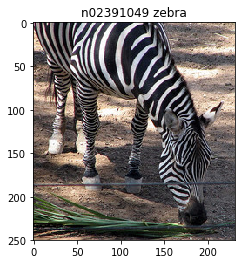

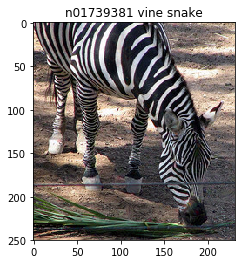

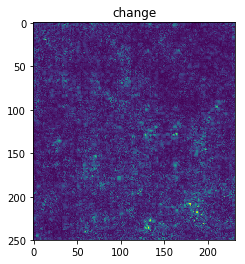

In [4]:
# 2)
zebra2 = np.copy(zebra)
with tf.Graph().as_default():
    meta, opers, X, Y , logits = get_from_graph()
    grad = tf.gradients(tf.gather(logits,index, axis=1), X)[0]
    
    with tf.Session() as sess:
        meta.restore(sess, "ResNet-L50.ckpt")
        for i in range(20):
            grad_new, y_new = sess.run([grad, Y], feed_dict={X: [zebra2]})
            index_new = np.argmax(y_new[0]).astype(int)                
            zebra2 = np.clip(zebra2 - eta * grad_new[0, ...], 0, 1)
            print("It is ",descs[index_new]," with probability ",y_new[0,index_new])

print_adv(zebra, zebra2, index, index_new)

INFO:tensorflow:Restoring parameters from ResNet-L50.ckpt
('It is ', 'n02391049 zebra', ' with probability ', 0.99991286)
('It is ', 'n02391049 zebra', ' with probability ', 0.99991322)
('It is ', 'n02391049 zebra', ' with probability ', 0.99991286)
('It is ', 'n02391049 zebra', ' with probability ', 0.99993753)
('It is ', 'n02391049 zebra', ' with probability ', 0.99994373)
('It is ', 'n02391049 zebra', ' with probability ', 0.99994791)
('It is ', 'n02391049 zebra', ' with probability ', 0.99984396)
('It is ', 'n02391049 zebra', ' with probability ', 0.99931979)
('It is ', 'n02391049 zebra', ' with probability ', 0.93686044)
('It is ', 'n02391049 zebra', ' with probability ', 0.74282879)
('It is ', 'n04442312 toaster', ' with probability ', 0.97084653)
('It is ', 'n04442312 toaster', ' with probability ', 0.99153298)
('It is ', 'n04442312 toaster', ' with probability ', 0.99933845)
('It is ', 'n04442312 toaster', ' with probability ', 0.99999118)
('It is ', 'n04442312 toaster', ' with

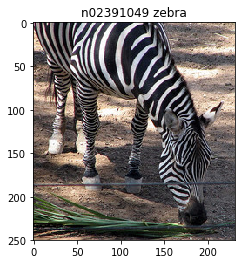

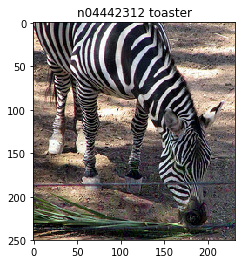

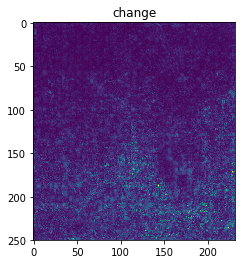

In [5]:
zebra2 = np.copy(zebra)
forced_class = 859

with tf.Graph().as_default():
    meta, opers, X, Y, logits = get_from_graph()
    grad = tf.gradients(tf.gather(logits,forced_class, axis=1), X)[0]
    with tf.Session() as sess:
        meta.restore(sess, "ResNet-L50.ckpt")
        for i in range(20):
            grad_new, y_new = sess.run([grad, Y], feed_dict={X: [zebra2]})
            index_new = np.argmax(y_new[0]).astype(int)                
            zebra2 = np.clip(zebra2 + eta * grad_new[0, ...], 0, 1)
            
            print("It is ",descs[index_new]," with probability ",y_new[0,index_new])

print_adv(zebra, zebra2, index, index_new)

In [10]:
# 3)
def bnorm(f, training):
    return tf.layers.batch_normalization(f, training = training, momentum = 0.99)
    
def residual_block(X, S,shortcut_path = 1, training = True):
    
    C = X.shape[-1]
    
    func = tf.nn.relu(X)
    func = tf.layers.conv2d(func, filters=C*S, kernel_size=3, strides=S, padding='same')
    func = bnorm(func, training)
    func = tf.layers.dropout(func, 0.3, training=training)
    func = tf.nn.relu(func)
    func = tf.layers.conv2d(func, filters=C*S, kernel_size=3, strides=1, padding='same')
    func = bnorm(func, training)
    
    if S == 1:
        short = X
    else:
        short = tf.layers.conv2d(X, filters=C*S, kernel_size=1, strides=S, padding='same')
    
    if shortcut_path > 1:
        short = 0.
        
    return short + func

def ResNet(X, Y, eta, batch, shortcut_path = 1, training = True ):
    
    X = tf.layers.conv2d(X, filters=16, kernel_size=3, strides=1, padding='same')
    for S in [1,1,2,1,1,2,1,1,1]:
        X = residual_block(X, S, shortcut_path = shortcut_path, training = training)
    X = tf.layers.average_pooling2d(X, X.shape[1:3], 1)
    X = tf.contrib.layers.flatten(X)
    logits = tf.layers.dense(X, 100)
    prob = tf.nn.softmax(logits)
    
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y,logits=logits))
    acc = tf.contrib.metrics.accuracy(Y, tf.cast(tf.argmax(prob, 1), tf.int32))
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(eta, global_step,batch*20, 1 / 10, staircase=True)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                               momentum=0.85, use_nesterov = True).minimize(loss)
    
    return prob, loss, acc, train

def run(epochs = 10, eta = 0.01, batch = 256, shortcut_path = 1, test_data = None):
    
    n = len(X_tr)
    with tf.Graph().as_default():
        training = tf.placeholder(tf.bool)
        X = tf.placeholder(tf.float32, [None, 32, 32, 3], name="X")
        Y = tf.placeholder(tf.int32, [None], name="Y")
        
        prob, loss, acc, train = ResNet(X,Y, eta, batch, shortcut_path, training)
        init = tf.global_variables_initializer()

        with tf.Session() as sess:
            sess.run(init)
            for i in range(epochs):
                perms = np.array_split(np.random.permutation(n),n/batch)
                acc_tr =[]
                for perm in perms:
                    train.run(feed_dict={X: X_tr[perm], Y:Y_tr[perm], training:True})
                    acc_tr = acc.eval(feed_dict={X: X_tr[perm], Y:Y_tr[perm], training:True})
                    
                acc_val = acc.eval(feed_dict={X: X_val, Y:Y_val, training:False})
                print("Epoch = ",i ," train accuracy = ", acc_tr,"val accuracy = ", acc_val)
            if test_data is not None:
                return prob.eval(feed_dict={X: test_data, training:False})
        
with tf.Graph().as_default():
    X = tf.placeholder(tf.float32, [None, 32,32,3])
    
    for S in [1, 2, 1, 2, 1, 2]:
        X = residual_block(X, S)
        print("S = ",S," shape of the block = ", X.shape)

('S = ', 1, ' shape of the block = ', TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(3)]))
('S = ', 2, ' shape of the block = ', TensorShape([Dimension(None), Dimension(16), Dimension(16), Dimension(6)]))
('S = ', 1, ' shape of the block = ', TensorShape([Dimension(None), Dimension(16), Dimension(16), Dimension(6)]))
('S = ', 2, ' shape of the block = ', TensorShape([Dimension(None), Dimension(8), Dimension(8), Dimension(12)]))
('S = ', 1, ' shape of the block = ', TensorShape([Dimension(None), Dimension(8), Dimension(8), Dimension(12)]))
('S = ', 2, ' shape of the block = ', TensorShape([Dimension(None), Dimension(4), Dimension(4), Dimension(24)]))


In [1]:
3%2

1

In [7]:
test_data = 2.*np.load("hw4-test-data.npy").astype(np.float32)/255.-1.
ans = np.argmax(run(test_data = test_data, epochs = 10),axis=1)
np.savetxt("hw4-test-labels.txt",ans)

('Epoch = ', 0, ' train accuracy = ', 0.15953307, 'val accuracy = ', 0.079999998)
('Epoch = ', 1, ' train accuracy = ', 0.21400778, 'val accuracy = ', 0.072999999)
('Epoch = ', 2, ' train accuracy = ', 0.28793773, 'val accuracy = ', 0.14650001)
('Epoch = ', 3, ' train accuracy = ', 0.33073929, 'val accuracy = ', 0.1735)
('Epoch = ', 4, ' train accuracy = ', 0.38132295, 'val accuracy = ', 0.227)
('Epoch = ', 5, ' train accuracy = ', 0.3774319, 'val accuracy = ', 0.278)
('Epoch = ', 6, ' train accuracy = ', 0.41245136, 'val accuracy = ', 0.29249999)
('Epoch = ', 7, ' train accuracy = ', 0.40856031, 'val accuracy = ', 0.30000001)
('Epoch = ', 8, ' train accuracy = ', 0.43968871, 'val accuracy = ', 0.3125)
('Epoch = ', 9, ' train accuracy = ', 0.47081712, 'val accuracy = ', 0.30399999)


In [8]:
test_data = 2.*np.load("hw4-test-data.npy").astype(np.float32)/255.-1.
ans = np.argmax(run(test_data = test_data, epochs = 100),axis=1)
np.savetxt("hw4-test-labels.txt",ans)

('Epoch = ', 0, ' train accuracy = ', 0.15564202, 'val accuracy = ', 0.054000001)
('Epoch = ', 1, ' train accuracy = ', 0.22178988, 'val accuracy = ', 0.078500003)
('Epoch = ', 2, ' train accuracy = ', 0.28015563, 'val accuracy = ', 0.1355)
('Epoch = ', 3, ' train accuracy = ', 0.32684824, 'val accuracy = ', 0.13500001)
('Epoch = ', 4, ' train accuracy = ', 0.29571983, 'val accuracy = ', 0.1725)
('Epoch = ', 5, ' train accuracy = ', 0.34630349, 'val accuracy = ', 0.21349999)
('Epoch = ', 6, ' train accuracy = ', 0.40856031, 'val accuracy = ', 0.2755)
('Epoch = ', 7, ' train accuracy = ', 0.44357976, 'val accuracy = ', 0.27599999)
('Epoch = ', 8, ' train accuracy = ', 0.5019455, 'val accuracy = ', 0.294)
('Epoch = ', 9, ' train accuracy = ', 0.5175097, 'val accuracy = ', 0.322)
('Epoch = ', 10, ' train accuracy = ', 0.49027237, 'val accuracy = ', 0.32300001)
('Epoch = ', 11, ' train accuracy = ', 0.5175097, 'val accuracy = ', 0.3405)
('Epoch = ', 12, ' train accuracy = ', 0.47859922, 'v

In [11]:
test_data = 2.*np.load("hw4-test-data.npy").astype(np.float32)/255.-1.
ans = np.argmax(run(test_data = test_data, epochs = 100),axis=1)
np.savetxt("hw4-test-labels.txt",ans)

('Epoch = ', 0, ' train accuracy = ', 0.097276263, 'val accuracy = ', 0.0144)
('Epoch = ', 1, ' train accuracy = ', 0.15175097, 'val accuracy = ', 0.035)
('Epoch = ', 2, ' train accuracy = ', 0.17898832, 'val accuracy = ', 0.111)
('Epoch = ', 3, ' train accuracy = ', 0.12451362, 'val accuracy = ', 0.14300001)
('Epoch = ', 4, ' train accuracy = ', 0.22178988, 'val accuracy = ', 0.18780001)
('Epoch = ', 5, ' train accuracy = ', 0.25291827, 'val accuracy = ', 0.2122)
('Epoch = ', 6, ' train accuracy = ', 0.26070037, 'val accuracy = ', 0.2418)
('Epoch = ', 7, ' train accuracy = ', 0.29182878, 'val accuracy = ', 0.22499999)
('Epoch = ', 8, ' train accuracy = ', 0.33073929, 'val accuracy = ', 0.25060001)
('Epoch = ', 9, ' train accuracy = ', 0.32684824, 'val accuracy = ', 0.2694)
('Epoch = ', 10, ' train accuracy = ', 0.3774319, 'val accuracy = ', 0.28459999)
('Epoch = ', 11, ' train accuracy = ', 0.3696498, 'val accuracy = ', 0.28220001)
('Epoch = ', 12, ' train accuracy = ', 0.38910505, 'v